## Project_2: Drivers of HDB Resale Price and Prediction
- 04 Evaluation and Conceptual Understanding
- Kaggle Challenge Submission

#### Content
> * [Problem Statement](#problem_statement) 
> * [Data Cleaning](#data_cleaning)
> * [EDA](#eda)
> * [Preprocessing and Modeling](#preprocessing_and_modeling)
> * [Evaluation and Conceptual Understanding](#evaluation_and_conceptual_understanding)
> * [Conclusion and Recommendations](#conclusion_and_recommendations)

---
<a id='problem_statement'></a>
## Problem Statement

Over the years, Singapore has seen the puzzling rise of public housing in the resale market with million dollar price tags, supporting the theory that “decent gains” can still be acquired, especially for HDB flats bought at subsidised prices from the Government. What are the factors contributing to high upside potential for these units? 

Research Findings: Property value is affected by the confluence of macro and micro, demand and supply factors.  

<details><summary> (1) Demand-pull inflation caused by shifts in socio-demographic micro-trends. </summary>
- Many young couples are willing to pay a premium to acquire a resale flat to avoid delaying plans to start a family. 
- More millenials are also opting to remain single and aspire to move out of their nests before they are eligible to purchase a BTO, to alleviate the strain on relationships and their mental health. Covid-19 has likely accelerated the desire to move out for many millenials.
- In response to these socio-demographic trends, the government is rethinking the 35 year-old age requirement for single Singaporeans. could elevate the demand for resale flats even further. 
- Based on a study conducted by the Ministry of Finance, Singaporeans' education, employment, wage outcomes have improved over the generations. Many are gainfully employed, as reflected in the high proportion of Singapore citizens in employment and the low unemployment rate.
</details>
<br> 
<details><summary> (2) Demand-pull inflation in the private housing market. </summary>
- Historical data on private property housing has shown that while sales volume and prices usually dip during a crisis such as a high inflation, high interest rate environment, it has not been the case for the private housing market in Singapore. More wealthy individuals from China and Hong Kong are moving into the Singapore private property market to escape XJP's common prosperity doctrine. This will drive the prices of private condominiums even higher, making it less affordable for many middle income Singaporeans. Being priced out of the private housing market, this substantial group of consumers will turn to the next best alternative - spacious resale flats. Demand for resale flats is projected to increase even more, driving resale prices even higher. 
</details>
<br> 
<details><summary> (3) Material cost-push inflation due to supply-chain disruptions, increasing costs of production. </summary>
- Supply disruptions from the Russia-Ukraine war and ongoing supply chain issues caused prices of core construction materials in Singapore, such as copper, steel, concrete, cement and bricks, to inflate and material costs are projected to remain elevated in the next few quarters. 
- Costs of production has yet to be offset by increasing productivity as digitalisation of the construction workforce is not an overnight process.
</details>
<br>
<details><summary> (4) Material cost-push inflation compounded by high-interest rates. </summary>
- As FEDs are resolute in their fight against inflation, businesses suffer amidst hawkish quantitative tightening (contractionary monetary policy). High interest rates reduce the developer’s ability to service debt, as rising costs are incurred by the organization with no corresponding increase in revenues to offset while the construction is on-going.
- These costs are likely to be passed on to home-buyers. 
</details>
<br>
You are part of the Research & Consultancy team in PropNext. Propnext would like to ride on the wave and increase the number of high-value sales and purchase transactions intermediated by PropNext agents. PropNext is looking to develop an in-house mobile application that is able to predict the selling price of HDB resale flats. The application would help real estate agents detect and look out for units with huge upside potential, so as to rake in higher commissions per sale. The team has to identify high-yield features that contribute to the appreciation of units and report their findings to the software development team in 2 weeks' time. The software developers will then communicate the requirements to the software engineers who would then build the application with the embedded predictive function in collaboration with data scientists. 

Task: Use the Singapore public housing data to create a regression model that predicts the `resale_price` of Housing Development Board (HDB) flats in Singapore.

---
<a id='evaluation_and_conceptual_understanding'></a>
## Evaluation and Conceptual Understanding

*All libraries should be added here.* 

In [1]:
# Import correct modules using accurate aliases
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import scipy.stats as stats
import numpy as np
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from datetime import datetime

%matplotlib inline

#### *Import `train_df.csv` dataset for preprocessing & modeling.*

In [2]:
# import hdb_train for further inspection
hdb_train = pd.read_pickle('../data/train_df.csv') 

In [3]:
hdb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   resale_price                 150634 non-null  float64
 1   floor_area_sqft              150634 non-null  float64
 2   hdb_age                      150634 non-null  int64  
 3   max_floor_lvl                150634 non-null  int64  
 4   mall_nearest_distance        150634 non-null  float64
 5   hawker_nearest_distance      150634 non-null  float64
 6   mrt_nearest_distance         150634 non-null  float64
 7   bus_stop_nearest_distance    150634 non-null  float64
 8   pri_sch_nearest_distance     150634 non-null  float64
 9   sec_sch_nearest_dist         150634 non-null  float64
 10  flat_type_cat                150634 non-null  int8   
 11  storey_range_cat             150634 non-null  int8   
 12  flat_model_Apartment         150634 non-null  uint8  
 13 

### Model Preparation #1: Create Features Matrix (X) and Target Vector (y)

In [4]:
hdb_train.describe()

,resale_price,floor_area_sqft,hdb_age,max_floor_lvl,mall_nearest_distance,hawker_nearest_distance,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,...,flat_model_Apartment,flat_model_Maisonette,flat_model_Model A,flat_model_Multi Generation,flat_model_New Generation,flat_model_Special,planning_area_west,planning_area_north_east,planning_area_east,planning_area_north
count,1.506340e+05,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,...,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000
mean,4.491615e+05,1046.235290,28.551536,15.139816,663.901799,1173.700148,765.007872,115.258966,395.172974,508.533220,...,0.140878,0.030936,0.368868,0.000372,0.155118,0.015813,0.240869,0.190229,0.213259,0.166622
std,1.433076e+05,262.674321,12.138829,6.232492,367.751216,1076.701337,429.366039,55.572855,234.760931,309.066265,...,0.347897,0.173145,0.482500,0.019278,0.362018,0.124753,0.427612,0.392483,0.409610,0.372640
min,1.500000e+05,333.684000,2.000000,2.000000,0.000000,1.873295,21.971410,9.001285,45.668324,38.913475,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.470000e+05,807.300000,20.000000,12.000000,392.328485,372.132398,458.266301,75.032491,227.083164,290.285883,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.200000e+05,1022.580000,29.000000,13.000000,602.818388,778.966980,682.621343,107.765999,348.876691,447.377670,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.200000e+05,1205.568000,37.000000,16.000000,866.941448,1678.949229,975.734180,146.652409,502.179385,644.284099,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.258000e+06,3013.920000,55.000000,50.000000,3496.402910,4907.036414,3544.504228,443.964584,3305.841039,3638.977233,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Step 1: Assemble our X and y variables
X = hdb_train.drop('resale_price', axis=1) 
y = hdb_train['resale_price']

---
### Model Preparation #2: Train / Test Split

- We always want to have a holdout set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [6]:
# Make a list of all numerical features, we will need them later
# We consider categorical variables that have been label encoded to be numerical
X_numerical = hdb_train.drop(['flat_model_Apartment', 'flat_model_Maisonette', 'flat_model_Model A',
                       'flat_model_Multi Generation', 'flat_model_New Generation', 'flat_model_Special',
                       'planning_area_west', 'planning_area_north_east', 'planning_area_east', 
                       'planning_area_north', 'resale_price'], axis=1).astype('float64')

In [7]:
# `list_numerical` will undergo feature scaling before model fitting
list_numerical = X_numerical.columns
list_numerical

Index(['floor_area_sqft', 'hdb_age', 'max_floor_lvl', 'mall_nearest_distance',
       'hawker_nearest_distance', 'mrt_nearest_distance',
       'bus_stop_nearest_distance', 'pri_sch_nearest_distance',
       'sec_sch_nearest_dist', 'flat_type_cat', 'storey_range_cat'],
      dtype='object')

In [8]:
# Step 2: Train-Test Split
# Default Train:Test ratio is 3:1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112975 entries, 119232 to 121958
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   floor_area_sqft              112975 non-null  float64
 1   hdb_age                      112975 non-null  int64  
 2   max_floor_lvl                112975 non-null  int64  
 3   mall_nearest_distance        112975 non-null  float64
 4   hawker_nearest_distance      112975 non-null  float64
 5   mrt_nearest_distance         112975 non-null  float64
 6   bus_stop_nearest_distance    112975 non-null  float64
 7   pri_sch_nearest_distance     112975 non-null  float64
 8   sec_sch_nearest_dist         112975 non-null  float64
 9   flat_type_cat                112975 non-null  int8   
 10  storey_range_cat             112975 non-null  int8   
 11  flat_model_Apartment         112975 non-null  uint8  
 12  flat_model_Maisonette        112975 non-null  uint8  

---
### Model Preparation #3 : Feature Scaling
- Scaling is only done for Linear Regression. Tree-based models do not require scaling as it does not affect performance.
- Since we're using LinearRegression, LassoCV, RidgeCV and ElasticNetCV, we'll want to scale our features. In the cell below, fit a StandardScaler to X_train and use it to transform both X_train and X_test.
- ML algorithms that use gradient descent as an optimization technique require data to be scaled.

In [10]:
# Step 3: Standardize, even though it is recommended to normalize data with non-Gaussian distribution instead.
# Standardize only Numerical and Categorical features that have been label encoded.
ss = StandardScaler()
ss.fit(X_train[list_numerical]) 
X_train[list_numerical] = ss.transform(X_train[list_numerical])
X_test[list_numerical] = ss.transform(X_test[list_numerical])

In [11]:
# X_train contains full set of training data after standardization of features
X_train.head(3)

,floor_area_sqft,hdb_age,max_floor_lvl,mall_nearest_distance,hawker_nearest_distance,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,flat_type_cat,...,flat_model_Apartment,flat_model_Maisonette,flat_model_Model A,flat_model_Multi Generation,flat_model_New Generation,flat_model_Special,planning_area_west,planning_area_north_east,planning_area_east,planning_area_north
119232,0.315498,-0.786641,0.618328,-0.895463,-0.784434,-0.782721,-0.678475,0.368935,3.285180,0.946068,...,0,0,0,0,0,0,0,0,0,0
77519,0.274537,0.615564,-0.503510,2.078288,-0.268051,-0.420708,-0.559372,-0.591934,-0.949260,-0.128426,...,0,0,1,0,0,0,0,0,0,0
102223,1.011823,0.285633,-0.503510,-0.667563,1.614315,-0.355144,1.082249,-0.997386,0.595831,0.946068,...,0,0,0,0,0,0,1,0,0,0


In [12]:
# X_test contains full set of testing data after standardization of features
X_test.head(3) 

,floor_area_sqft,hdb_age,max_floor_lvl,mall_nearest_distance,hawker_nearest_distance,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,flat_type_cat,...,flat_model_Apartment,flat_model_Maisonette,flat_model_Model A,flat_model_Multi Generation,flat_model_New Generation,flat_model_Special,planning_area_west,planning_area_north_east,planning_area_east,planning_area_north
107690,-0.298907,-0.621675,-0.022723,-0.789039,1.366353,-1.124714,-1.009230,-1.131434,-0.441437,-0.128426,...,0,0,1,0,0,0,0,1,0,0
100411,1.011823,-0.539193,0.137540,-0.385994,1.013774,-0.606448,0.191504,-0.949750,-0.743659,0.946068,...,0,0,0,0,0,0,0,1,0,0
23295,1.953910,-0.044297,-0.343248,0.248898,-0.865382,-1.182067,-0.659263,-0.906196,0.290512,2.020562,...,1,0,0,0,0,0,0,0,0,0


---
### Model Preparation #4 : Outlier Detection to Ensure Normal Distribution of Target Variable

In [13]:
# Not neccessary for linear regression

---
### Model Preparation #5: Instantiate our Models

- We'll be evaluating `LinearRegression`, `LassoCV`, `RidgeCV` and `ElasticNetCV`, so we'll need to create instances of all four models.

In [14]:
# Instantiate Linear Regression Model
lr = LinearRegression()

In [15]:
# Instantiate LassoCV Model with default 5 fold cross-validation
lasso_cv = LassoCV(cv=5, random_state=1, max_iter=10000) 

In [16]:
# Instantiate RidgeCV Model with default 5 fold cross-validation
ridge_cv = RidgeCV(cv=5)

In [17]:
# Instantiate ElasticNetCV Model with default 5 fold cross-validation
elnet_cv = ElasticNetCV(cv=5, random_state=1, max_iter=10000)

---
### Model Fitting and Evaluation
- Fit the model to the training data, and evaluate the training and test scores in the next segment.

In [18]:
# Fit lr model
lr.fit(X_train, y_train) 

LinearRegression()

In [19]:
# Fit lassoCV model
lasso_cv.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=1)

In [20]:
# Get the best alpha value
lasso_cv.alpha_

94.9012759674535

In [21]:
# Fit ridgeCV model
ridge_cv.fit(X_train, y_train)

RidgeCV(cv=5)

In [22]:
# Get the best alpha value
ridge_cv.alpha_

0.1

In [23]:
# Fit elasticnetCV model
elnet_cv.fit(X_train, y_train)

ElasticNetCV(cv=5, max_iter=10000, random_state=1)

In [24]:
# Get the best alpha value
elnet_cv.alpha_

189.80255193490703

*Use `cross_val_score()` to evaluate all four models.*

In [25]:
# Compute accuracy using cross_val_score() for linear regression model
print(f'The cross validation score for the linear regression model is {cross_val_score(lr, X_train, y_train, cv=5).mean()}.')

# Compute accuracy using cross_val_score() for lasso_cv regularisation regression model
print(f'The cross validation score for the lassoCV regression model is {cross_val_score(lasso_cv, X_train, y_train, cv=5).mean()}.')

# Compute accuracy using cross_val_score() for ridge_cv regularisation regression model
print(f'The cross validation score for the ridgeCV regression model is {cross_val_score(ridge_cv, X_train, y_train, cv=5).mean()}.')

# Compute accuracy using cross_val_score() for elasticnet_cv regression model
print(f'The cross validation score for the elasticnetCV regression model is {cross_val_score(elnet_cv, X_train, y_train, cv=5).mean()}.')

The cross validation score for the linear regression model is 0.8184950216500233.
The cross validation score for the lassoCV regression model is 0.818003100628091.
The cross validation score for the ridgeCV regression model is 0.8184950212994895.
The cross validation score for the elasticnetCV regression model is 0.02886066860012624.


*Use `model.score()` to evaluate all four models - accuracy.*

In [26]:
# Compute accuracy using lr.score() 
print(f'The linear regression model achieved an accuracy rate of {lr.score(X_train, y_train)} on the training data.') 
print(f'The linear regression model achieved an accruacy rate of {lr.score(X_test, y_test)} on the validation data.')

# Compute accuracy using lasso_cv.score()
print(f'The lassoCV regression model achieved an accuracy rate of {lasso_cv.score(X_train, y_train)} on the training data.')
print(f'The lassoCV regression model achieved an accuracy rate of {lasso_cv.score(X_test, y_test)} on the validation data.')

# Compute accuracy using ridge_cv.score()
print(f'The ridgeCV regression model achieved an accuracy rate of {ridge_cv.score(X_train, y_train)} on the training data.')
print(f'The ridgeCV regression model achieved an accuracy rate of {ridge_cv.score(X_test, y_test)} on the validation data.')

# Compute accuracy using elnet_cv.score()
print(f'The elasticnetCV regression model achieved an accruacy rate of {elnet_cv.score(X_train, y_train)} on the training data.')
print(f'The elasticnetCV regression model achieved an accuracy rate of {elnet_cv.score(X_test, y_test)} on the validation data.')

The linear regression model achieved an accuracy rate of 0.8185866874737797 on the training data.
The linear regression model achieved an accruacy rate of 0.8166919669446058 on the validation data.
The lassoCV regression model achieved an accuracy rate of 0.8180943607765139 on the training data.
The lassoCV regression model achieved an accuracy rate of 0.8163301809938974 on the validation data.
The ridgeCV regression model achieved an accuracy rate of 0.8185866860310792 on the training data.
The ridgeCV regression model achieved an accuracy rate of 0.8166919290914773 on the validation data.
The elasticnetCV regression model achieved an accruacy rate of 0.0289096747355716 on the training data.
The elasticnetCV regression model achieved an accuracy rate of 0.028718852083416402 on the validation data.


*Use `metrics.r2_score()` to evaluate all four models - accuracy.*

In [27]:
# Compute y_train_pred for linear regression model
y_train_pred = lr.predict(X_train)
# Compute accuracy score using metrics.r2_score()
print(f'The linear regression model achieved an R2 score of {metrics.r2_score(y_train, y_train_pred)} on the training data.')

# Compute y_train_pred for lasso_cv regression model
y_train_pred = lasso_cv.predict(X_train)
# Compute accuracy score using metrics.r2_score()
print(f'The lassoCV regression model achieved an R2 score of {metrics.r2_score(y_train, y_train_pred)} on the training data.')

# Compute y_train_pred for ridge_cv regression model
y_train_pred = ridge_cv.predict(X_train) 
# Compute accuracy score using metrics.r2_score()
print(f'The ridgeCV regression model achieved an R2 score of {metrics.r2_score(y_train, y_train_pred)} on the training data.')

# Compute y_train_pred for elsticnet_cv regression model
y_train_pred = elnet_cv.predict(X_train) 
# Compute accuracy score using metrics.r2_score()
print(f'The elasticnetCV regression model achieved an R2 score of {metrics.r2_score(y_train, y_train_pred)} on the training data.')

The linear regression model achieved an R2 score of 0.8185866874737797 on the training data.
The lassoCV regression model achieved an R2 score of 0.8180943607765139 on the training data.
The ridgeCV regression model achieved an R2 score of 0.8185866860310792 on the training data.
The elasticnetCV regression model achieved an R2 score of 0.0289096747355716 on the training data.


In [28]:
# Compute y_test_pred for linear regression model
y_test_pred = lr.predict(X_test)
# Compute accuracy score using metrics.r2_score()
print(f'The linear regression model achieved an R2 score of {metrics.r2_score(y_test, y_test_pred)} on the validation data.')

# Compute y_test_pred for lasso_cv regression model
y_test_pred = lasso_cv.predict(X_test)
# Compute accuracy score using metrics.r2_score()
print(f'The lassoCV regression model achieved an R2 score of {metrics.r2_score(y_test, y_test_pred)} on the validation data.')

# Compute y_train_pred for ridge_cv regression model
y_test_pred = ridge_cv.predict(X_test) 
# Compute accuracy score using metrics.r2_score()
print(f'The ridgeCV regression model achieved an R2 score of {metrics.r2_score(y_test, y_test_pred)} on the validation data.')

# Compute y_train_pred for elsticnet_Cv regression model
y_test_pred = elnet_cv.predict(X_test) 
# Compute accuracy score using metrics.r2_score()
print(f'The elasticnetCV regression model achieved an R2 score of {metrics.r2_score(y_test, y_test_pred)} on the validation data.')

The linear regression model achieved an R2 score of 0.8166919669446058 on the validation data.
The lassoCV regression model achieved an R2 score of 0.8163301809938974 on the validation data.
The ridgeCV regression model achieved an R2 score of 0.8166919290914773 on the validation data.
The elasticnetCV regression model achieved an R2 score of 0.028718852083416402 on the validation data.


*Use `metrics.mean_squared_error()` to evaluate all four models - RMSE.*

In [29]:
# Compute y_train_pred for linear regression model
y_train_pred = lr.predict(X_train)
# Compute root mean square error (RMSE) using metrics.mean_squared_error()
print(f'The linear regression model produced a RMSE of {metrics.mean_squared_error(y_train, y_train_pred, squared=False)} on the training data.')

# Compute y_train_pred for lasso_cv regression model
y_train_pred = lasso_cv.predict(X_train)
# Compute root mean square error (RMSE) using metrics.mean_squared_error()
print(f'The lassoCV regression model produced a RMSE of {metrics.mean_squared_error(y_train, y_train_pred, squared=False)} on the training data.')

# Compute y_train_pred for ridge_cv regression model
y_train_pred = ridge_cv.predict(X_train) 
# Compute root mean square error (RMSE) using metrics.mean_squared_error()
print(f'The ridgeCV regression model produced a RMSE of {metrics.mean_squared_error(y_train, y_train_pred, squared=False)} on the training data.')

# Compute y_train_pred for elsticnet_cv regression model
y_train_pred = elnet_cv.predict(X_train) 
# Compute root mean square error (RMSE) using metrics.mean_squared_error()
print(f'The elasticnetCV regression model produced a RMSE of {metrics.mean_squared_error(y_train, y_train_pred, squared=False)} on the training data.')

The linear regression model produced a RMSE of 61116.25322478133 on the training data.
The lassoCV regression model produced a RMSE of 61199.12690158335 on the training data.
The ridgeCV regression model produced a RMSE of 61116.2534677967 on the training data.
The elasticnetCV regression model produced a RMSE of 141400.82997465954 on the training data.


In [30]:
# Compute y_test_pred for linear regression model
y_test_pred = lr.predict(X_test)
# Compute root mean square error (RMSE) using metrics.mean_squared_error()
print(f'The linear regression model produced a RMSE of {metrics.mean_squared_error(y_test, y_test_pred, squared=False)} on the validation data.')

# Compute y_test_pred for lasso_cv regression model
y_test_pred = lasso_cv.predict(X_test)
# Compute root mean square error (RMSE) using metrics.mean_squared_error()
print(f'The lassoCV regression model produced a RMSE of {metrics.mean_squared_error(y_test, y_test_pred, squared=False)} on the validation data.')

# Compute y_test_pred for ridge_cv regression model
y_test_pred = ridge_cv.predict(X_test) 
# Compute root mean square error (RMSE) using metrics.mean_squared_error()
print(f'The ridgeCV regression model produced a RMSE of {metrics.mean_squared_error(y_test, y_test_pred, squared=False)} on the validation data.')

# Compute y_test_pred for elasticnet_cv regression model
y_test_pred = elnet_cv.predict(X_test) 
# Compute root mean square error (RMSE) using metrics.mean_squared_error()
print(f'The elasticnetCV regression model produced a RMSE of {metrics.mean_squared_error(y_test, y_test_pred, squared=False)} on the validation data.')

The linear regression model produced a RMSE of 61116.50028832591 on the validation data.
The lassoCV regression model produced a RMSE of 61176.781858246744 on the validation data.
The ridgeCV regression model produced a RMSE of 61116.50659860751 on the validation data.
The elasticnetCV regression model produced a RMSE of 140682.54242291336 on the validation data.


---
<a id='evaluation_and_conceptual_understanding'></a>
## 6. Deploy Best Performing Model on Unseen Data

In [31]:
# Check hdb_train for columns
hdb_train.columns

Index(['resale_price', 'floor_area_sqft', 'hdb_age', 'max_floor_lvl',
       'mall_nearest_distance', 'hawker_nearest_distance',
       'mrt_nearest_distance', 'bus_stop_nearest_distance',
       'pri_sch_nearest_distance', 'sec_sch_nearest_dist', 'flat_type_cat',
       'storey_range_cat', 'flat_model_Apartment', 'flat_model_Maisonette',
       'flat_model_Model A', 'flat_model_Multi Generation',
       'flat_model_New Generation', 'flat_model_Special', 'planning_area_west',
       'planning_area_north_east', 'planning_area_east',
       'planning_area_north'],
      dtype='object')

#### *Import `hdb_test.csv` dataset for preprocessing & modeling.*

In [32]:
# import hdb_train before preprocessing 
hdb_test = pd.read_pickle('../data/hdb_test.csv') 

In [33]:
hdb_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 76 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         16737 non-null  category      
 1   tranc_yearmonth            16737 non-null  datetime64[ns]
 2   town                       16737 non-null  category      
 3   flat_type                  16737 non-null  category      
 4   block                      16737 non-null  category      
 5   street_name                16737 non-null  category      
 6   storey_range               16737 non-null  category      
 7   floor_area_sqm             16737 non-null  float64       
 8   flat_model                 16737 non-null  category      
 9   lease_commence_date        16737 non-null  int64         
 10  tranc_year                 16737 non-null  datetime64[ns]
 11  tranc_month                16737 non-null  datetime64[ns]
 12  mid_

In [34]:
# Check hdb_test for columns
hdb_test.columns

Index(['id', 'tranc_yearmonth', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'tranc_year', 'tranc_month', 'mid_storey', 'lower', 'upper', 'mid',
       'full_flat_type', 'address', 'floor_area_sqft', 'hdb_age',
       'max_floor_lvl', 'year_completed', 'residential', 'commercial',
       'market_hawker', 'multistorey_carpark', 'precinct_pavilion',
       'total_dwelling_units', '1room_sold', '2room_sold', '3room_sold',
       '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'postal', 'latitude', 'longitude', 'planning_area',
       'mall_nearest_distance', 'mall_within_500m', 'mall_within_1km',
       'mall_within_2km', 'hawker_nearest_distance', 'hawker_within_500m',
       'hawker_within_1km', 'hawker_within_2km', 'hawker_food_stalls',
       'hawker_market_stalls', 'mrt_nearest_distan

In [35]:
# Select for all features that are of interest to hdb_test
hdb_test = hdb_test[['flat_model', 'planning_area', 'flat_type', 'storey_range',
                     'floor_area_sqft', 'hdb_age', 'max_floor_lvl', 
                     'mall_nearest_distance', 'hawker_nearest_distance', 'mrt_nearest_distance', 
                     'bus_stop_nearest_distance', 'pri_sch_nearest_distance', 'sec_sch_nearest_dist']]

Label encode categorical data `flat_type` and `storey_range`.

In [36]:
# Check out unique classes and value count for 'flat_type'
hdb_test['flat_type'].value_counts()

4 ROOM              6867
3 ROOM              4364
5 ROOM              3992
EXECUTIVE           1264
2 ROOM               235
MULTI-GENERATION       8
1 ROOM                 7
Name: flat_type, dtype: int64

In [37]:
# Label encode 'flat_type'

# Assign numerical values and store in another column
hdb_test['flat_type_cat'] = hdb_test['flat_type'].cat.codes
hdb_test['flat_type_cat'].value_counts()

3    6867
2    4364
4    3992
5    1264
1     235
6       8
0       7
Name: flat_type_cat, dtype: int64

In [38]:
# Drop 'flat_type' column, because you have 'flat_type_cat'
hdb_test.drop('flat_type', axis=1, inplace=True)

In [39]:
# Check if 'flat_type' has been replaced with 'flat_type_cat'
# Note that 'flat_type_cat' is now a numerical (discrete) variable - int8
hdb_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   flat_model                 16737 non-null  category
 1   planning_area              16737 non-null  category
 2   storey_range               16737 non-null  category
 3   floor_area_sqft            16737 non-null  float64 
 4   hdb_age                    16737 non-null  int64   
 5   max_floor_lvl              16737 non-null  int64   
 6   mall_nearest_distance      16737 non-null  float64 
 7   hawker_nearest_distance    16737 non-null  float64 
 8   mrt_nearest_distance       16737 non-null  float64 
 9   bus_stop_nearest_distance  16737 non-null  float64 
 10  pri_sch_nearest_distance   16737 non-null  float64 
 11  sec_sch_nearest_dist       16737 non-null  float64 
 12  flat_type_cat              16737 non-null  int8    
dtypes: category(3), float64(7), int

In [40]:
# Check out unique classes and value count for 'storey_range'
hdb_test['storey_range'].value_counts()

04 TO 06    3813
07 TO 09    3410
01 TO 03    3100
10 TO 12    3001
13 TO 15    1448
16 TO 18     627
19 TO 21     256
01 TO 05     250
06 TO 10     247
22 TO 24     178
11 TO 15     115
25 TO 27     104
28 TO 30      55
37 TO 39      30
16 TO 20      27
31 TO 33      24
34 TO 36      22
40 TO 42      15
21 TO 25       5
26 TO 30       3
43 TO 45       3
46 TO 48       3
49 TO 51       1
Name: storey_range, dtype: int64

In [41]:
# Label encode 'storey_range'

# Assign numerical values and store in another column
hdb_test['storey_range_cat'] = hdb_test['storey_range'].cat.codes
hdb_test['storey_range_cat'].value_counts()

2     3813
4     3410
0     3100
5     3001
7     1448
8      627
10     256
1      250
3      247
12     178
6      115
13     104
15      55
18      30
9       27
16      24
17      22
19      15
11       5
14       3
21       3
20       3
22       1
Name: storey_range_cat, dtype: int64

In [42]:
# Drop 'storey_range' column, because now you have 'storey_range_cat'
hdb_test.drop('storey_range', axis=1, inplace=True)

In [43]:
# Check if 'storey_range' has been replaced with 'storey_range_cat'
# Note that 'storey_range_cat' is now a numerical (discrete) variable - int8
hdb_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   flat_model                 16737 non-null  category
 1   planning_area              16737 non-null  category
 2   floor_area_sqft            16737 non-null  float64 
 3   hdb_age                    16737 non-null  int64   
 4   max_floor_lvl              16737 non-null  int64   
 5   mall_nearest_distance      16737 non-null  float64 
 6   hawker_nearest_distance    16737 non-null  float64 
 7   mrt_nearest_distance       16737 non-null  float64 
 8   bus_stop_nearest_distance  16737 non-null  float64 
 9   pri_sch_nearest_distance   16737 non-null  float64 
 10  sec_sch_nearest_dist       16737 non-null  float64 
 11  flat_type_cat              16737 non-null  int8    
 12  storey_range_cat           16737 non-null  int8    
dtypes: category(2), float64(7), int

Dummy encode categorical variables `flat_model`, and `planning_area`.

In [44]:
# Check out unique classes and value count for 'flat_model'
hdb_test['flat_model'].value_counts()

Model A                   5239
Improved                  4201
New Generation            2552
Premium Apartment         1716
Simplified                 829
Apartment                  646
Standard                   567
Maisonette                 453
Model A2                   258
DBSS                       150
Adjoined flat               30
Type S1                     29
Model A-Maisonette          29
Type S2                     12
Terrace                     10
Multi Generation             8
Premium Apartment Loft       4
Premium Maisonette           2
Improved-Maisonette          2
Name: flat_model, dtype: int64

In [45]:
# Further group classes in `flat_model` to reduce the number of classes
# Dummy encode `flat_model`

# Re-categorize `flat_model` to reduce number of classes
# Categories: 'Model A', 'Maisonette', 'Special', 'Apartment', 'Standard', 'New Generation', 'Multi Generation'

replace_values = {'Model A-Maisonette':'Maisonette', 
                  'Improved-Maisonette':'Maisonette',
                  'Premium Maisonette':'Maisonette',
                  'Model A2':'Model A',
                  'Simplified':'Model A',  
                  'Type S1':'Special',
                  'Type S2':'Special',
                  'DBSS':'Special',
                  'Adjoined flat':'Special',
                  'Terrace':'Special',
                  'Premium Apartment':'Apartment',
                  'Premium Apartment Loft':'Apartment',
                  'Improved':'Standard',
                  '2-room':'Standard'} # `2-room` is missing in `flat_model` for test.csv 

hdb_test.replace({'flat_model': replace_values}, inplace=True)

# Check if 'flat_model' values have been re-classified
hdb_test['flat_model'].value_counts()

Model A             6326
Standard            4768
New Generation      2552
Apartment           2366
Maisonette           486
Special              231
Multi Generation       8
Name: flat_model, dtype: int64

In [46]:
# Dummy encode 'flat_model'
hdb_test = pd.get_dummies(hdb_test, columns=['flat_model'], prefix=['flat_model'])

# Remove `flat_model_Standard`, setting it as the baseline
hdb_test = hdb_test.drop('flat_model_Standard', axis=1)

In [47]:
# Check to see if 'flat_model' has been dummy encoded into 7-1 other dummy variables 
# 'flat_model_apartment','flat_model_maisonette', 'flat_model_model_A', 
# 'flat_model_multi_generation','flat_model_new_generation', 'flat_model_special'
# Note that 6 new dummy variables are now numerical (discrete) in nature - uint8
hdb_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   planning_area                16737 non-null  category
 1   floor_area_sqft              16737 non-null  float64 
 2   hdb_age                      16737 non-null  int64   
 3   max_floor_lvl                16737 non-null  int64   
 4   mall_nearest_distance        16737 non-null  float64 
 5   hawker_nearest_distance      16737 non-null  float64 
 6   mrt_nearest_distance         16737 non-null  float64 
 7   bus_stop_nearest_distance    16737 non-null  float64 
 8   pri_sch_nearest_distance     16737 non-null  float64 
 9   sec_sch_nearest_dist         16737 non-null  float64 
 10  flat_type_cat                16737 non-null  int8    
 11  storey_range_cat             16737 non-null  int8    
 12  flat_model_Apartment         16737 non-null  uint8   
 13  f

In [48]:
# Consider re-classifying values based on district
# or region (north/south/east/west/central or CCR/RCR/OCR)
print(hdb_test['planning_area'].value_counts())
print(hdb_test['planning_area'].nunique())

Jurong West                1246
Woodlands                  1242
Sengkang                   1242
Tampines                   1140
Yishun                     1096
Bedok                      1015
Punggol                     865
Ang Mo Kio                  824
Hougang                     803
Choa Chu Kang               713
Bukit Merah                 655
Bukit Batok                 649
Bukit Panjang               646
Toa Payoh                   560
Pasir Ris                   537
Queenstown                  466
Geylang                     434
Sembawang                   401
Clementi                    389
Kallang                     369
Serangoon                   349
Jurong East                 335
Bishan                      330
Novena                      123
Marine Parade               121
Outram                       85
Rochor                       45
Bukit Timah                  41
Changi                        6
Downtown Core                 6
Tanglin                       3
Western 

In [49]:
# Re-categorize `planning_area` to reduce number of classes
# Categories: 'north', 'east', 'west', 'central', 'north_east'
# Source: URA

replace_values = {'Jurong West':'west',
                  'Choa Chu Kang':'west',
                  'Bukit Batok':'west',
                  'Bukit Panjang':'west',
                  'Clementi':'west',
                  'Jurong East':'west',
                  'Western Water Catchment':'west',
                  'Woodlands':'north',
                  'Yishun':'north',
                  'Sembawang':'north',
                  'Sengkang':'north_east',
                  'Ang Mo Kio':'north_east',
                  'Serangoon':'north_east',
                  'Hougang':'north_east',
                  'Bukit Merah':'central',
                  'Toa Payoh':'central',
                  'Bishan':'central',
                  'Novena':'central',
                  'Downtown Core':'central',
                  'Tanglin':'central',
                  'Outram':'central',
                  'Rochor':'central',
                  'Bukit Timah':'central',
                  'Queenstown':'central',
                  'Marine Parade':'central',
                  'Geylang':'central',
                  'Kallang':'central',
                  'Tampines':'east',
                  'Bedok':'east',
                  'Punggol':'east',
                  'Pasir Ris':'east',
                  'Changi':'east'}

hdb_test.replace({'planning_area': replace_values}, inplace=True)

# Check if 'planning_area' values have been re-classified
hdb_test['planning_area'].value_counts()

west          3979
east          3563
central       3238
north_east    3218
north         2739
Name: planning_area, dtype: int64

In [50]:
# Dummy encode 'planning_area'
hdb_test = pd.get_dummies(hdb_test, columns=['planning_area'], prefix=['planning_area'], drop_first=True) # 'planning_area_central is baseline

In [51]:
# Check to see if 'planning_area' has been dummy encoded into 5-1 other dummy variables 
# 'planning_area_west','planning_area_north_east', 'planning_area_east', 'planning_area_north'
# Note that 4 new dummy variables are now numerical (discrete) in nature - uint8
hdb_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   floor_area_sqft              16737 non-null  float64
 1   hdb_age                      16737 non-null  int64  
 2   max_floor_lvl                16737 non-null  int64  
 3   mall_nearest_distance        16737 non-null  float64
 4   hawker_nearest_distance      16737 non-null  float64
 5   mrt_nearest_distance         16737 non-null  float64
 6   bus_stop_nearest_distance    16737 non-null  float64
 7   pri_sch_nearest_distance     16737 non-null  float64
 8   sec_sch_nearest_dist         16737 non-null  float64
 9   flat_type_cat                16737 non-null  int8   
 10  storey_range_cat             16737 non-null  int8   
 11  flat_model_Apartment         16737 non-null  uint8  
 12  flat_model_Maisonette        16737 non-null  uint8  
 13  flat_model_Model

In [52]:
# Create test_df.csv 
hdb_test.to_pickle('../data/test_df.csv')

---
## Generate 'Null' Model CSV for Kaggle Baseline Submission
- For computation of baseline score that my model has to beat minimally.
- After data cleaning (do not drop columns and rows for both `train.csv` and `test.csv` before computation of baseline performance on kaggle) - because csv file has to be of certain shape (16737, 2)
- After evaluation of baseline model on kaggle, you can drop columns and rows as you deem fit.


In [53]:
# import hdb_train
# hdb_train = pd.read_pickle('../data/hdb_train.csv') 

In [54]:
# import hdb_test
hdb_test = pd.read_pickle('../data/hdb_test.csv')

In [55]:
# Compute mean of resale_price in cleaned `hdb_train`
hdb_train['resale_price'].mean()

449161.50121307274

In [56]:
# Create a dataframe for kaggle submission
# Create column 'id' from cleaned hdb_test.csv
df_kaggle_submission = hdb_test[['id']]

In [57]:
# Check the number of rows required for submission
df_kaggle_submission.shape

(16737, 1)

In [58]:
# Baseline Model will be comparing the y_actual (y_actual values from test.csv, cleaned) 
# against y_pred (mean y_actual values from train.csv, cleaned)
# kaggle will compute RMSE
df_kaggle_submission['Predicted'] = hdb_train['resale_price'].mean()
df_kaggle_submission

/var/folders/1k/lmhy97td4h17yfgn7vlzp0ph0000gn/T/ipykernel_30584/1592424808.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kaggle_submission['Predicted'] = hdb_train['resale_price'].mean()


,id,Predicted
0,114982,449161.501213
1,95653,449161.501213
2,40303,449161.501213
3,109506,449161.501213
4,100149,449161.501213
...,...,...
16732,23347,449161.501213
16733,54003,449161.501213
16734,128921,449161.501213
16735,69352,449161.501213


In [59]:
# Drop index to fit kaggle submission - is this a neccessary step?
df_kaggle_submission.reset_index(drop=True, inplace=True)

In [60]:
# Create csv file for Kaggle Baseline Submission
df_kaggle_submission.to_csv('../data/kaggle_baseline_submission.csv', index=False)

---
## Create CSV for Kaggle Prediction Submission

In [61]:
# import test_df 
hdb_test = pd.read_pickle('../data/test_df.csv')

In [62]:
# Check to see if 'planning_area' has been dummy encoded into 5-1 other dummy variables 
# 'planning_area_west','planning_area_north_east', 'planning_area_east', 'planning_area_north'
# Note that 4 new dummy variables are now numerical (discrete) in nature - uint8
hdb_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   floor_area_sqft              16737 non-null  float64
 1   hdb_age                      16737 non-null  int64  
 2   max_floor_lvl                16737 non-null  int64  
 3   mall_nearest_distance        16737 non-null  float64
 4   hawker_nearest_distance      16737 non-null  float64
 5   mrt_nearest_distance         16737 non-null  float64
 6   bus_stop_nearest_distance    16737 non-null  float64
 7   pri_sch_nearest_distance     16737 non-null  float64
 8   sec_sch_nearest_dist         16737 non-null  float64
 9   flat_type_cat                16737 non-null  int8   
 10  storey_range_cat             16737 non-null  int8   
 11  flat_model_Apartment         16737 non-null  uint8  
 12  flat_model_Maisonette        16737 non-null  uint8  
 13  flat_model_Model

In [63]:
# Create X_test from hdb_test
# Note that previous X_test y_test from hdb_train are merely X_eval and y_eval
X_test = hdb_test

In [64]:
list_numerical 

Index(['floor_area_sqft', 'hdb_age', 'max_floor_lvl', 'mall_nearest_distance',
       'hawker_nearest_distance', 'mrt_nearest_distance',
       'bus_stop_nearest_distance', 'pri_sch_nearest_distance',
       'sec_sch_nearest_dist', 'flat_type_cat', 'storey_range_cat'],
      dtype='object')

In [65]:
# Standardize only Numerical and Categorical features that have been label encoded.
X_test[list_numerical] = ss.transform(X_test[list_numerical])

In [66]:
len(X_test.columns)

21

In [67]:
# Make sure there are 16737 y_test_pred values
len(X_test)

16737

In [68]:
# Get predicted values
y_test_pred = lr.predict(X_test)

In [69]:
# Check mean value of y_test_pred
y_test_pred.mean()

447854.26070267573

In [70]:
len(y_test_pred)

16737

In [71]:
# Kaggle Baseline Submission
df_kaggle_submission.head(3)

,id,Predicted
0,114982,449161.501213
1,95653,449161.501213
2,40303,449161.501213


In [72]:
df_kaggle_submission['Predicted'] = y_test_pred

In [73]:
y_test_pred

array([315201.95838723, 515522.23798012, 333306.85257192, ...,
       415056.82414397, 457027.76432273, 383832.93500723])

In [74]:
df_kaggle_submission.head(3)

,id,Predicted
0,114982,315201.958387
1,95653,515522.237980
2,40303,333306.852572


In [75]:
df_kaggle_submission.shape

(16737, 2)

In [76]:
# Kaggle Prediction Submission
df_kaggle_submission.to_csv('../data/kaggle_prediction_submission.csv', index=False)

## Kaggle Submission # 1 Screenshot
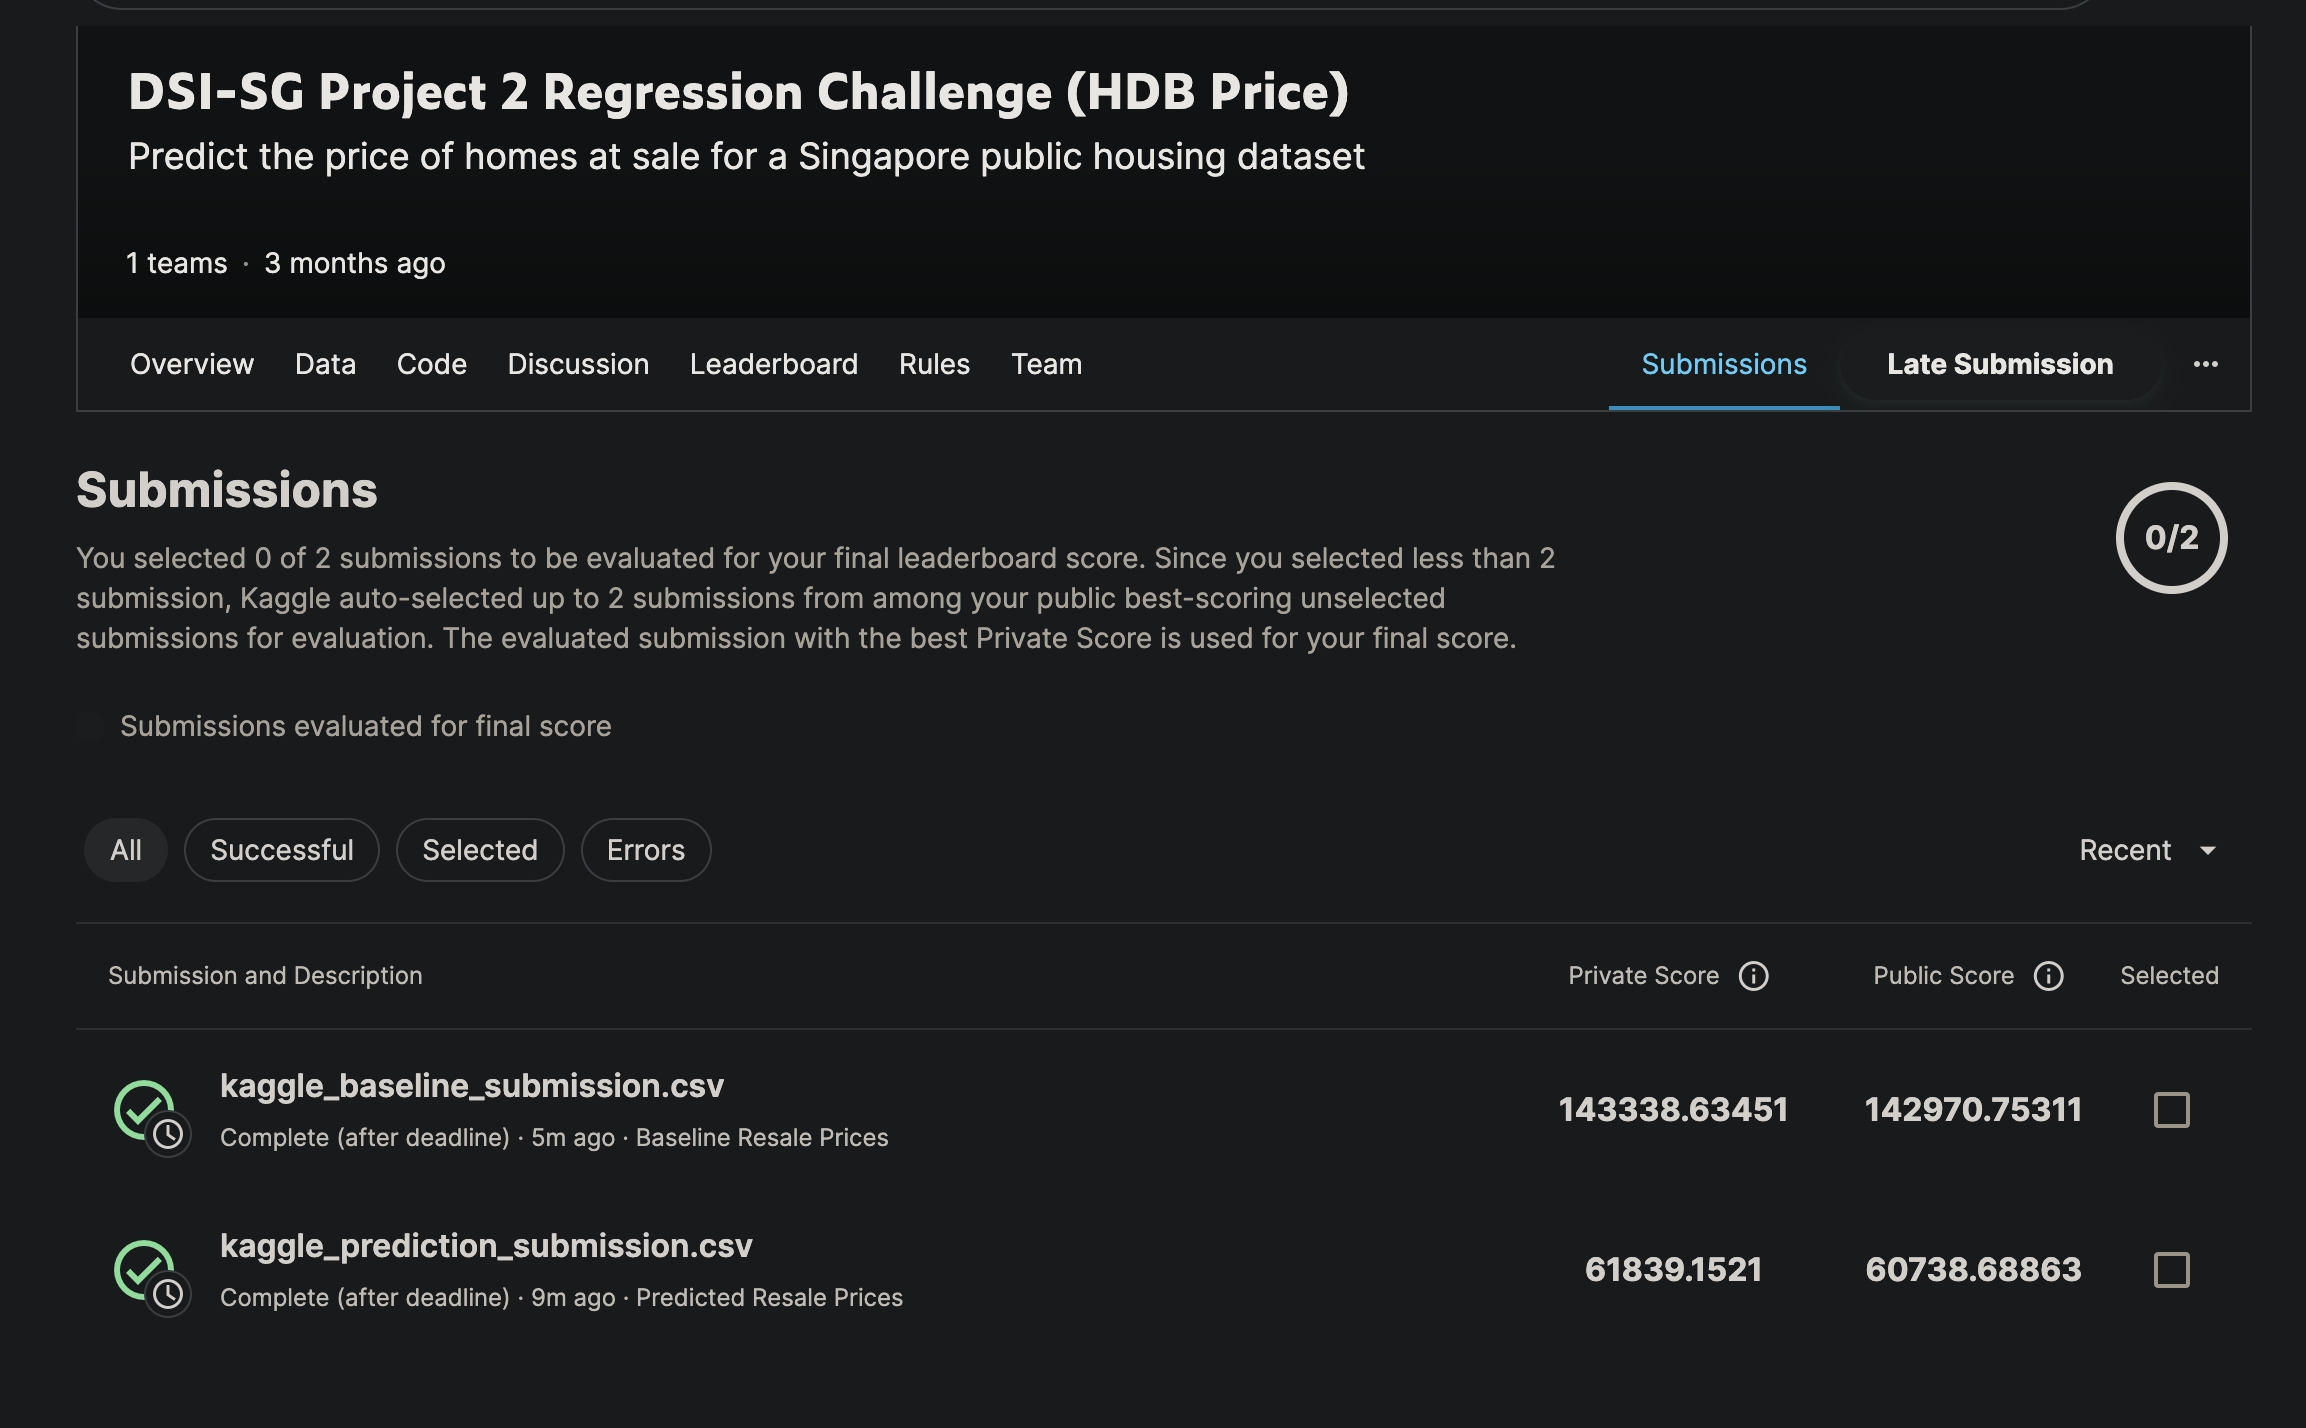

In [77]:
cdf = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficients'])
print(cdf)

                              Coefficients
floor_area_sqft               77423.652194
hdb_age                      -31953.202095
max_floor_lvl                 22922.144959
mall_nearest_distance         -4516.719565
hawker_nearest_distance      -22576.739431
mrt_nearest_distance         -20569.629690
bus_stop_nearest_distance      1117.560230
pri_sch_nearest_distance       4822.321960
sec_sch_nearest_dist            957.413681
flat_type_cat                 21458.487038
storey_range_cat              18594.841771
flat_model_Apartment          13797.783918
flat_model_Maisonette         67656.254925
flat_model_Model A            13130.931262
flat_model_Multi Generation  119929.231448
flat_model_New Generation     40762.513400
flat_model_Special           140783.153364
planning_area_west          -126263.056124
planning_area_north_east     -90515.866199
planning_area_east           -78583.086523
planning_area_north         -162410.367478


In [78]:
cdf.sort_values(by='Coefficients', ascending=False)

,Coefficients
flat_model_Special,140783.153364
flat_model_Multi Generation,119929.231448
floor_area_sqft,77423.652194
flat_model_Maisonette,67656.254925
flat_model_New Generation,40762.513400
max_floor_lvl,22922.144959
flat_type_cat,21458.487038
storey_range_cat,18594.841771
flat_model_Apartment,13797.783918
flat_model_Model A,13130.931262
